In [1904]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-v0_8')

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Data Check

In [1905]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1906]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1907]:
df_train.shape

(891, 12)

In [1908]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum())/df_train[col].shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


isnull() = 해당 column의 value가 null이면 True, 아니면 False 반환

근데 sum이 어떻게 되느냐? False + False = 0이지만 True+True=1임. 즉 sum하면 null인 value의 개수를 셀수 있다

In [1909]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum())/df_test[col].shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<Axes: >

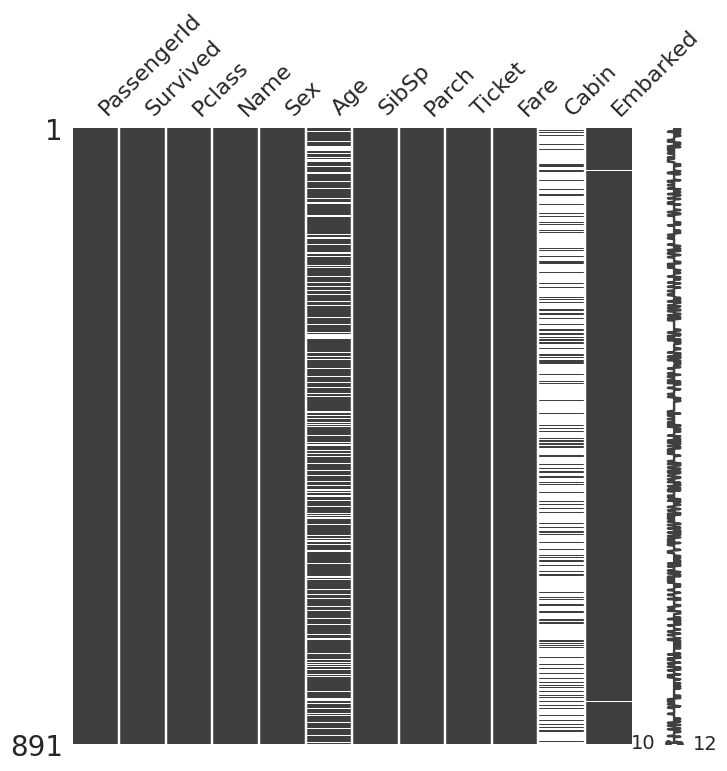

In [1910]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8,8))

df.iloc은 [r_start:r_end, c_start:c_end] 로 생각하면댐

# 2. EDA

# 2-0. Target Label 찾기

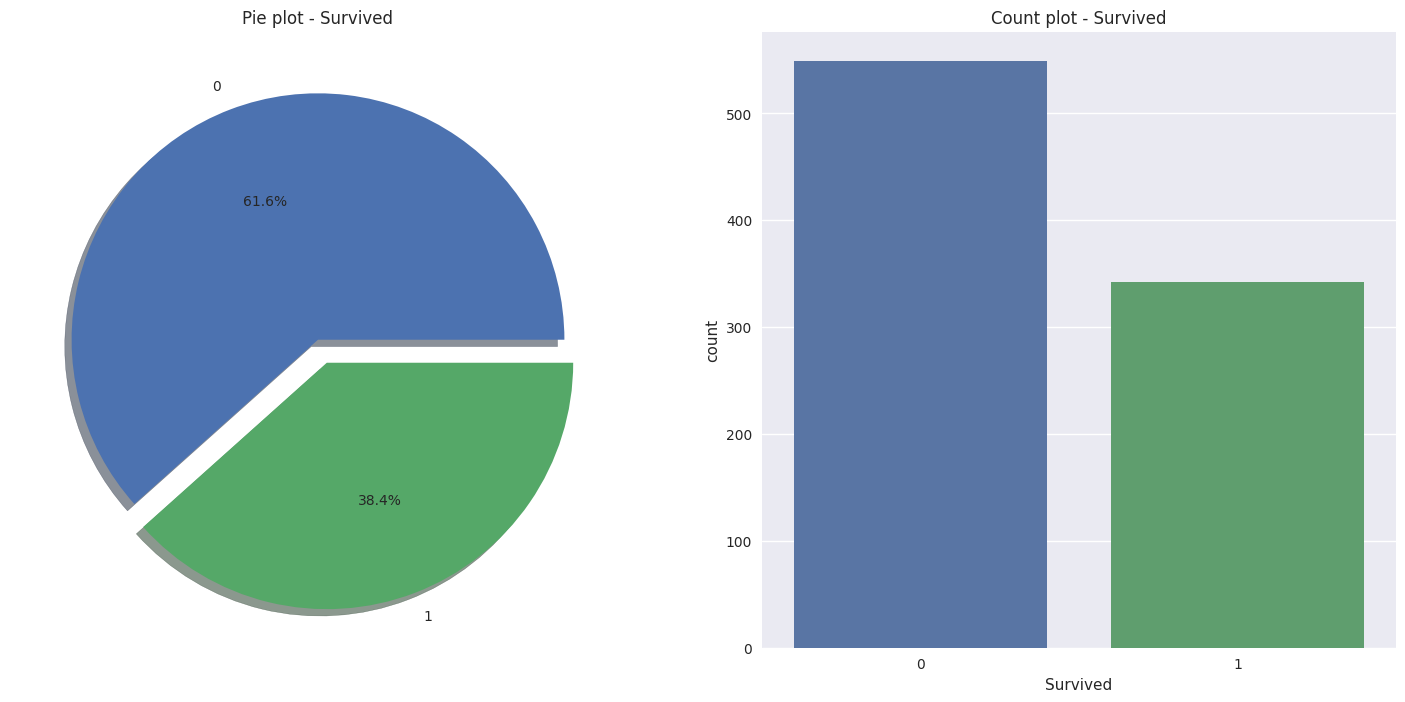

In [1911]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [1912]:
891*0.384

342.144

342명정도 생존..ㅠ

In [1913]:
df_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

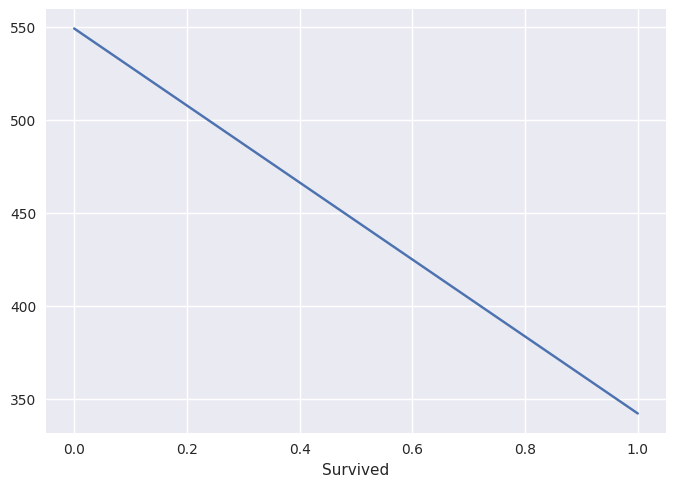

In [1914]:
df_train['Survived'].value_counts().plot()

pd.Series는 plot을 가지고 있다. (matplotlib이랑 연계됨)

<Axes: ylabel='count'>

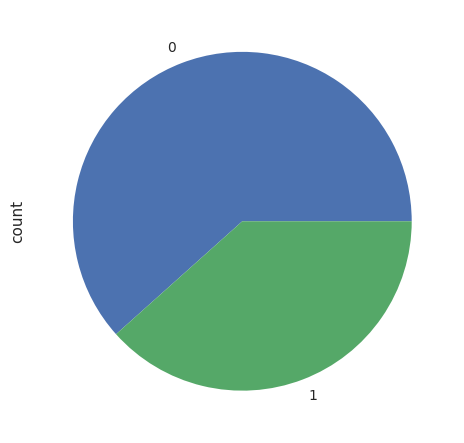

In [1915]:
df_train['Survived'].value_counts().plot.pie()

pie()를 쓰니까는 plot이 원으로 바뀌네?

<Axes: ylabel='count'>

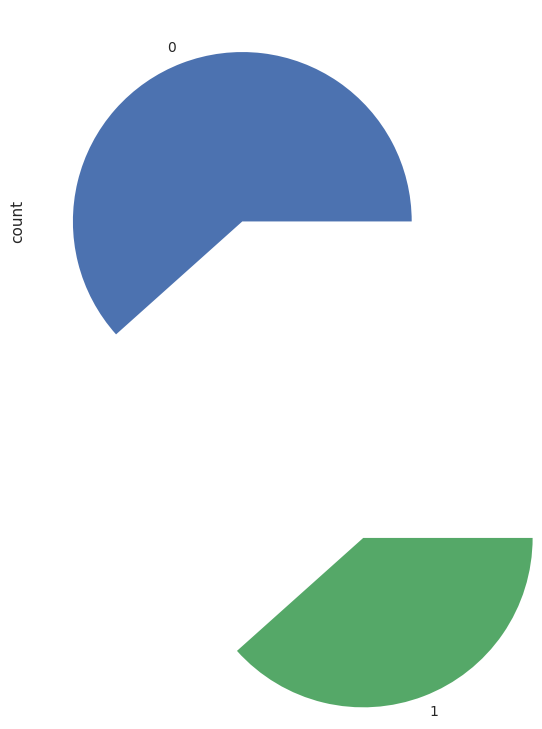

In [1916]:
df_train['Survived'].value_counts().plot.pie(explode=[0, 2])

pie에서 explode값을 바꿔주니깐은 경계를 쫙 쪼개줌

ax는 array로 0번째, 1번째 subplot을 저장

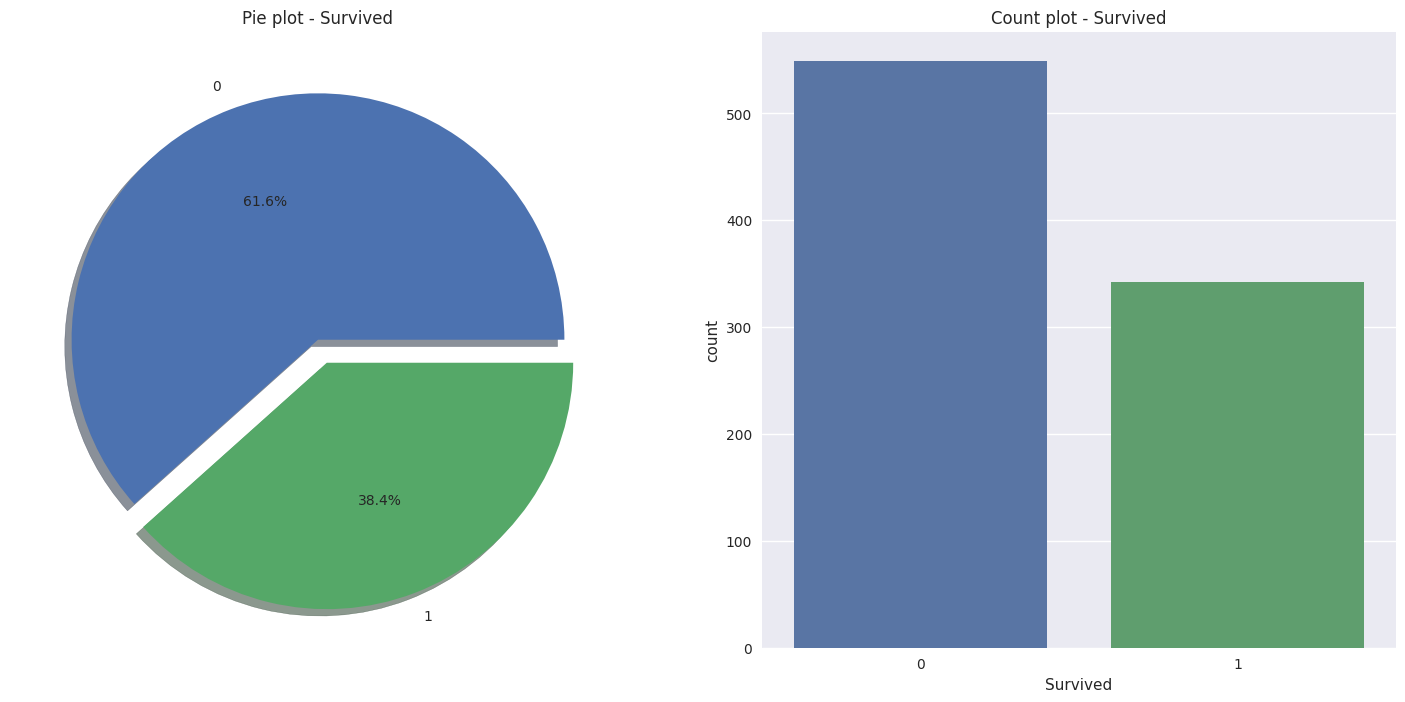

In [1917]:
f

# 2-1. Pclass

In [1918]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Target Label인 Survived를 제외하면 11개의 feature가 존재.
각 feature를 직관적으로 파악하면서 어떤 feature가 target label에 영향을 많이 끼치는지 추론이 가능해야함.

In [1919]:
df_train['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

값이 1, 2, 3범주 안에서 노는것을 확인가능

In [1920]:
df_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [1921]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [1922]:
df_train[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [1923]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


sum으로 했을때는 얘가 0, 1이중에 하나의 값을 가지기 때문에 전체 값이 아님

In [1924]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [1925]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


In [1926]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [1927]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass'>

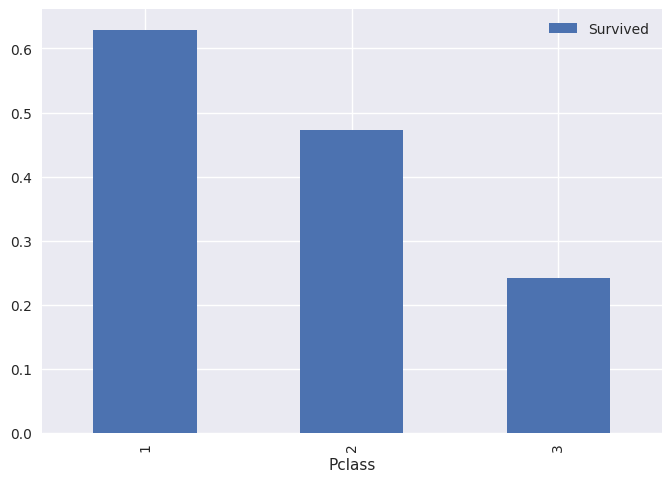

In [1928]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

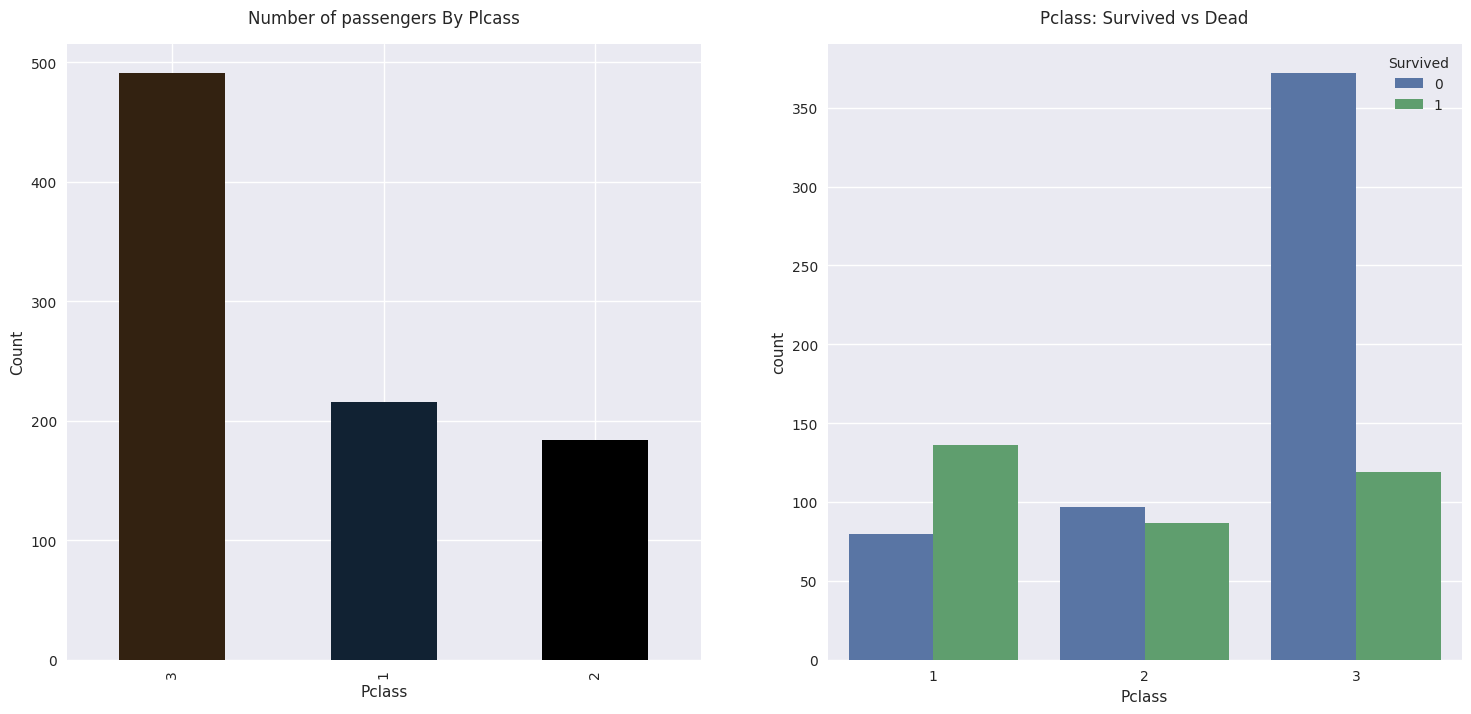

In [1929]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#332211', '#112233', '#000000'], ax=ax[0])
ax[0].set_title('Number of passengers By Plcass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

첫번째 그래프는 pclass별 사람 수. 즉 3번 클래스에 탄 사람이 가장 많고 당므으로 2번, 1번 클래스에 탄 사람이 많다

두번째 그래프에서 얻을 수 있는 정보는 1번 클래스에서는 산 사람이 죽은 사람보다 많고, 2번 클래스에서는 죽은사람이 더 많긴 하지만 비율이 차이가 크게 안나고, 3번 클래스는 죽은 사람이 압도적으로 많다는 것이다. <br>
그러니까 pclass가 좋은 좌석일수록 생존에 큰 영향을 끼치고 잇다는 것을 알수있다

# 2-2. Sex

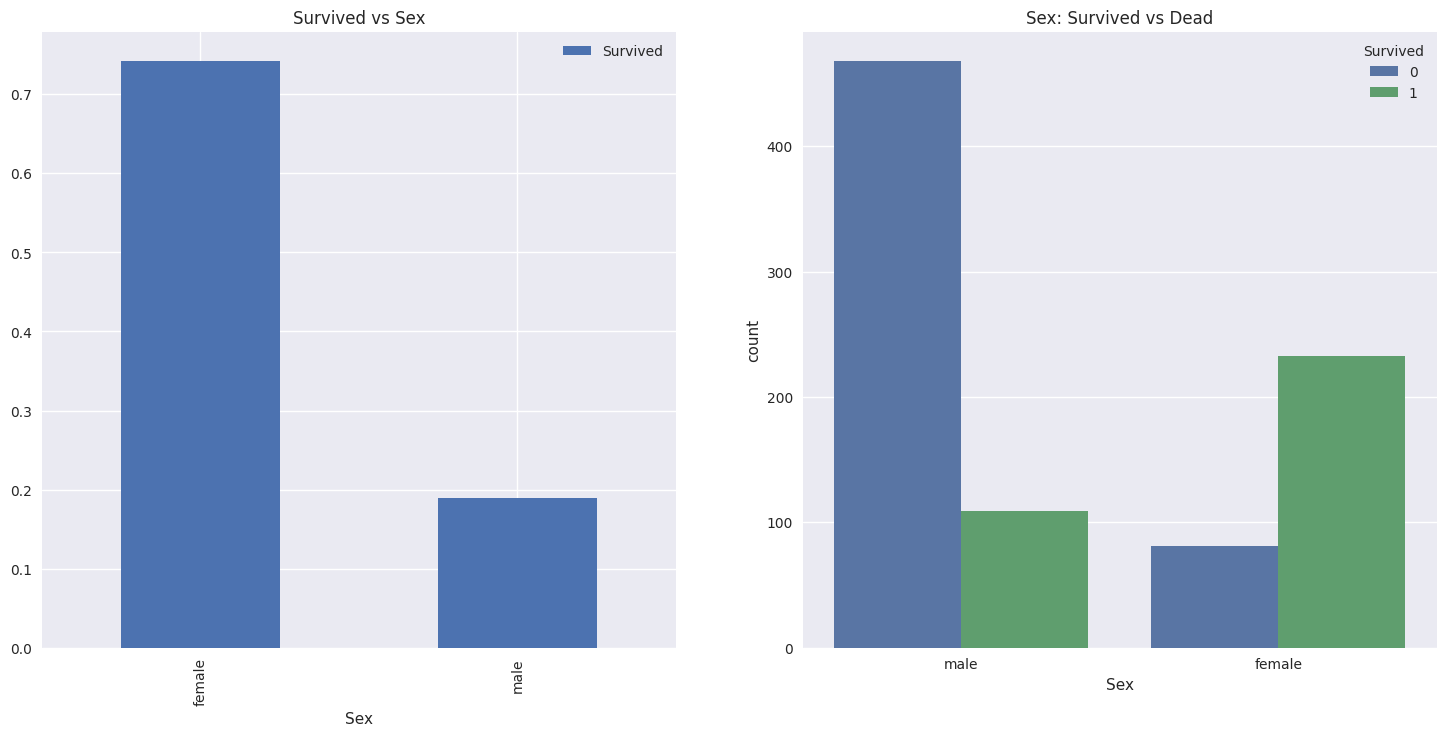

In [1930]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<Axes: xlabel='Sex'>

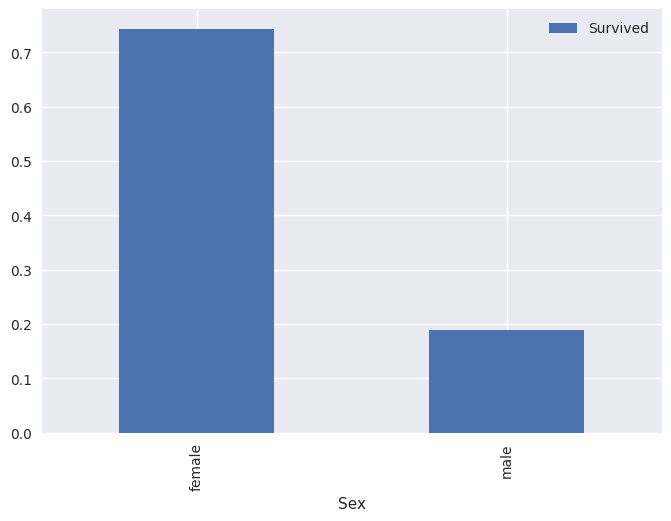

In [1931]:
df_train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

In [1932]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [1933]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


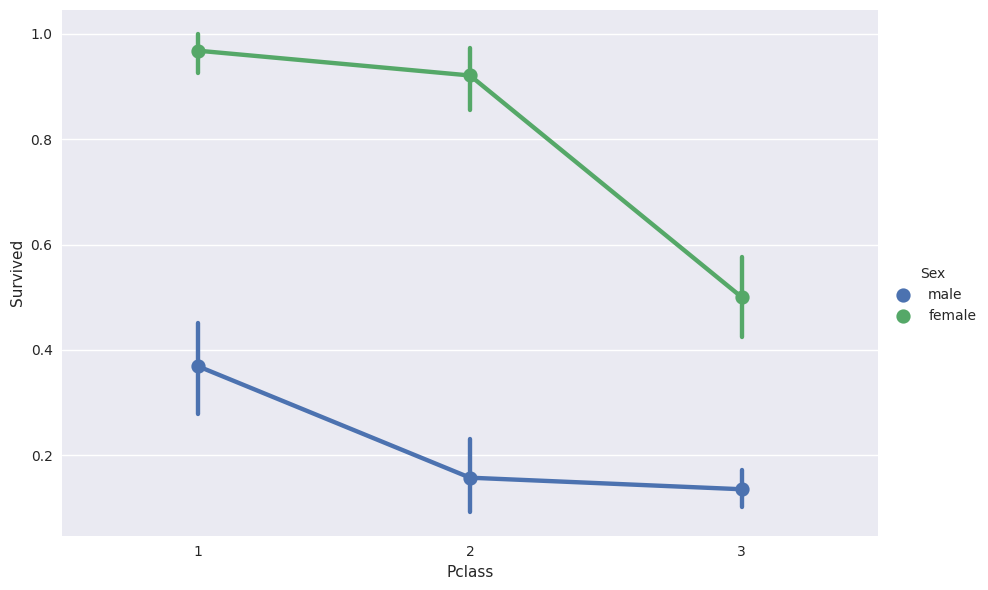

In [1934]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, kind='point', height=6, aspect=1.5)

seaborn factorplot 대신 catplot으로 바뀜.

결론<br>
-여자가 일단 많이 살았다<br>
-자리가 좋은 곳이 많이 살았다

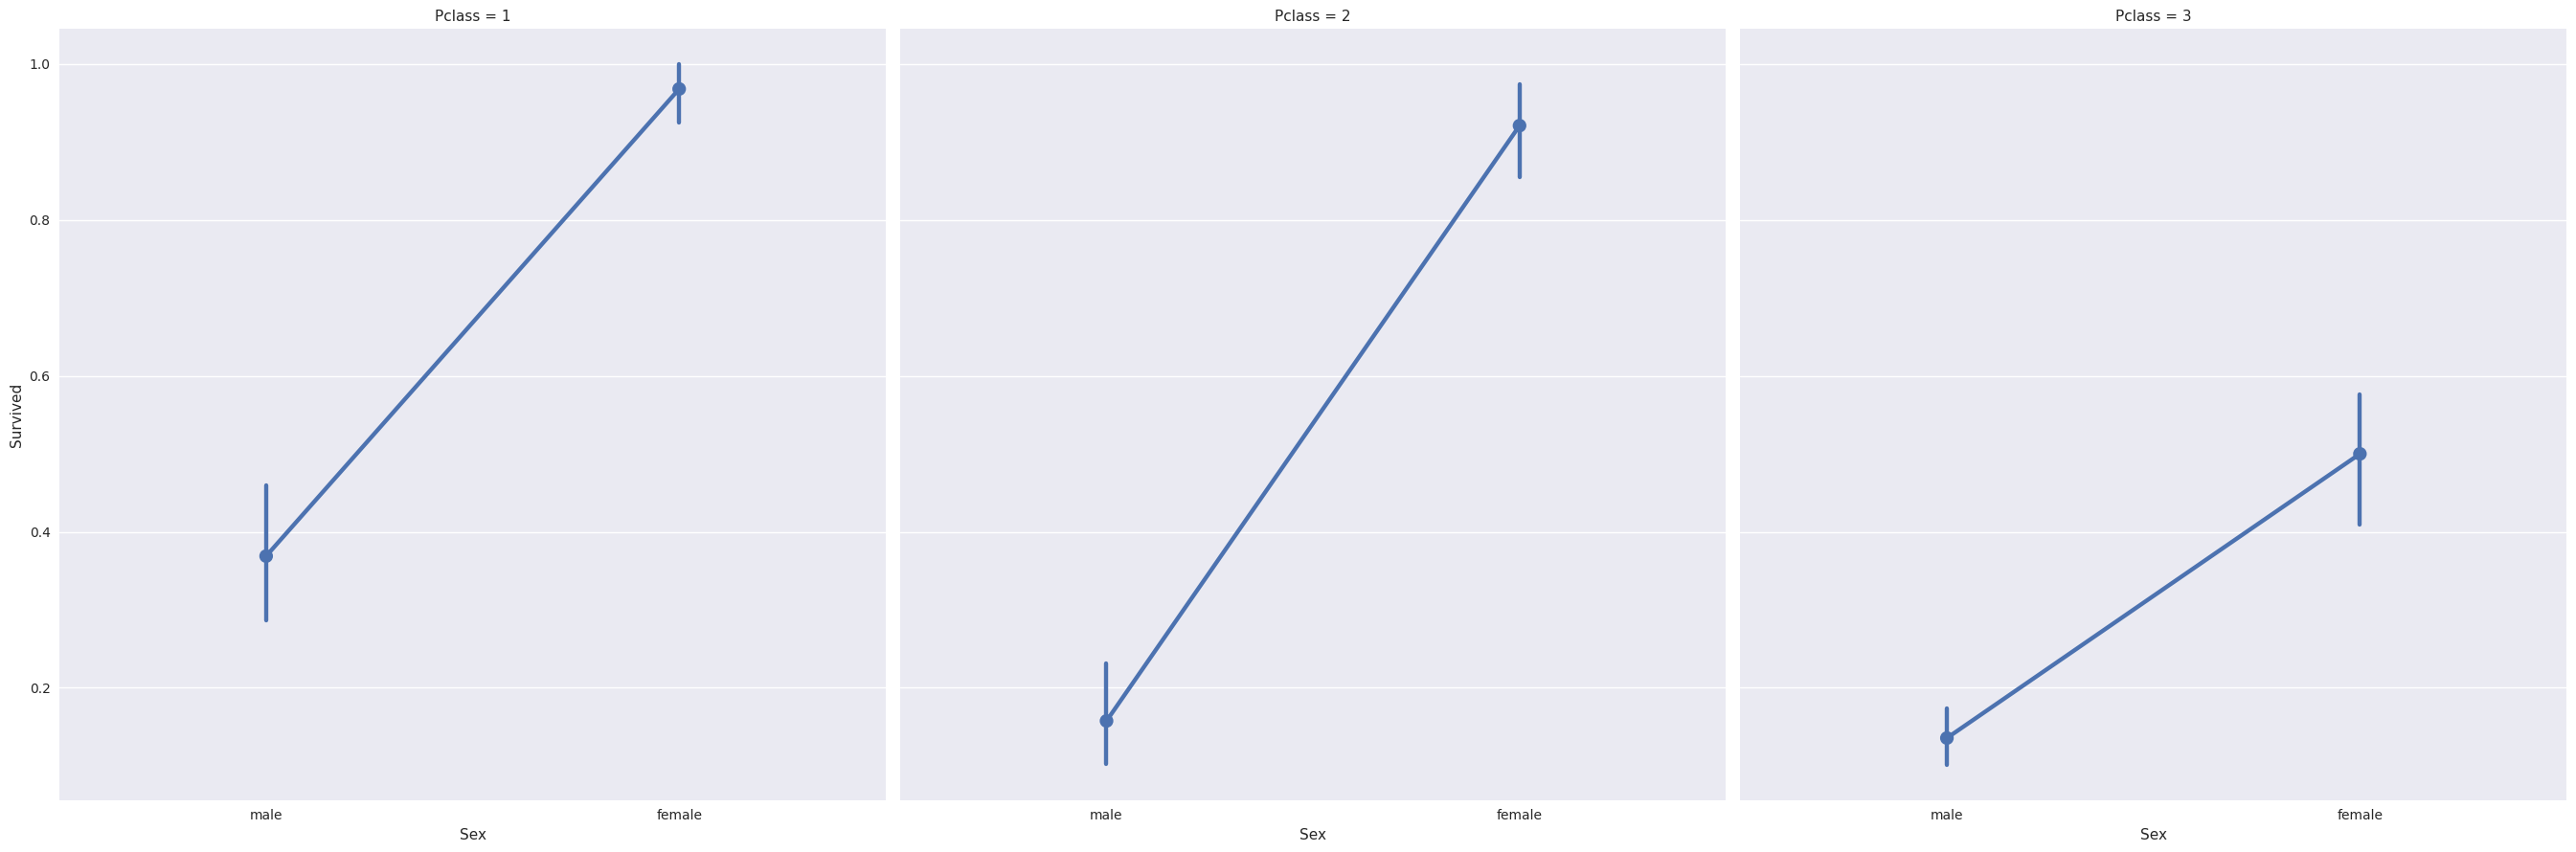

In [1935]:
sns.catplot(x='Sex', y='Survived', col='Pclass', data=df_train, height=9, aspect=1, kind='point')

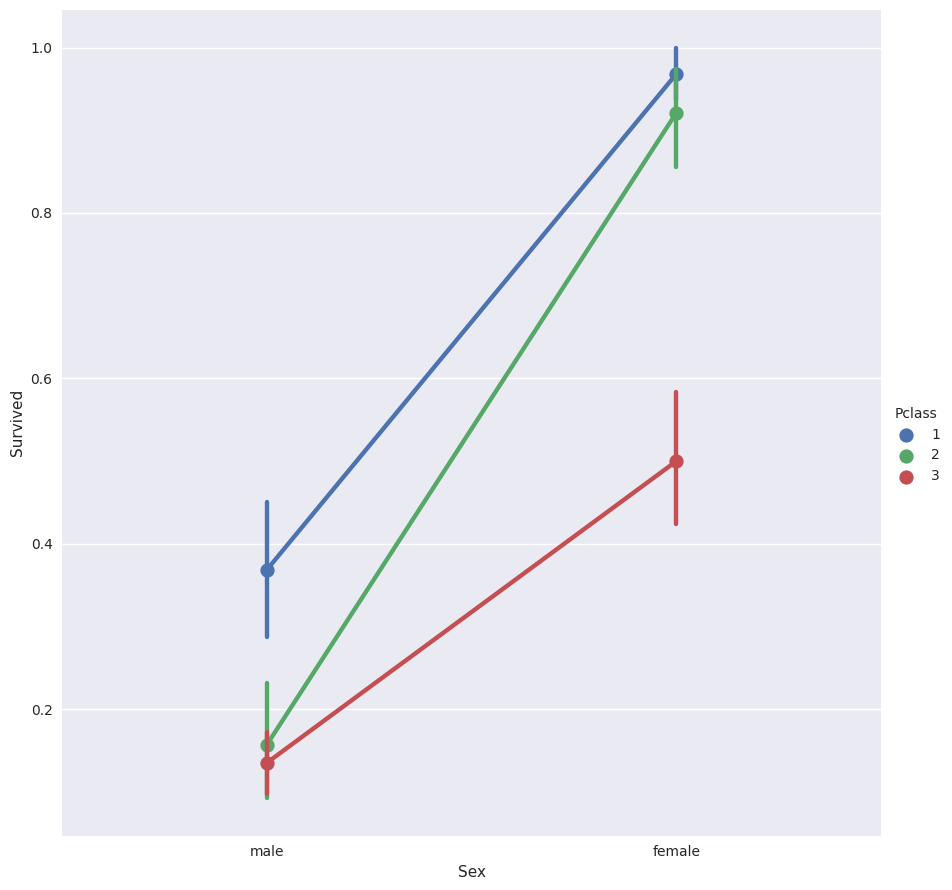

In [1936]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', data=df_train, height=9, aspect=1, kind='point')

catplot의 parameter중 col과 hue의 차이<br>
여담으로 저 포인트에 나있는 수직 작대기는 errorbar로, 저게 길수록 오차범위가 크다는 뜻. 작은것이 신뢰도 있는 data임

# 2-3. Age

In [1937]:
print('제일 나이 많은 탑승객: {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 years
제일 어린 탑승객 0.4 years
탑승객 평균 나이 29.7 years


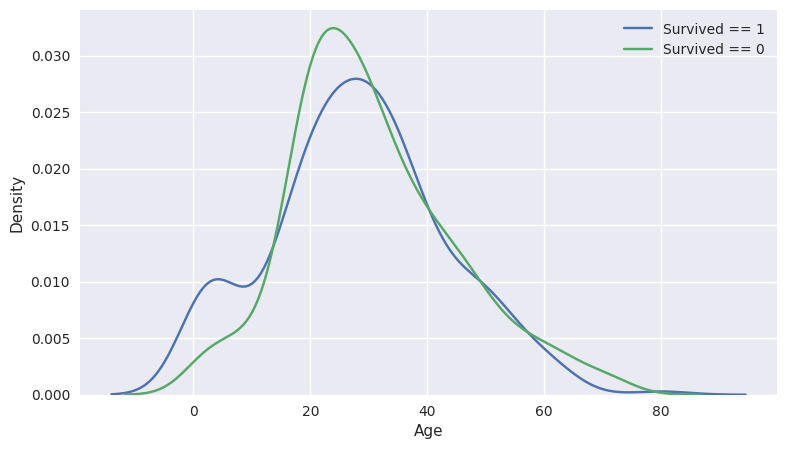

In [1938]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

kde = kernel density estimation

In [1939]:
df_train.iloc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [1940]:
for row in df_train.iterrows():
    break
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                               22.0
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [1941]:
df_train['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [1942]:
df_train[df_train['Survived'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


<Axes: >

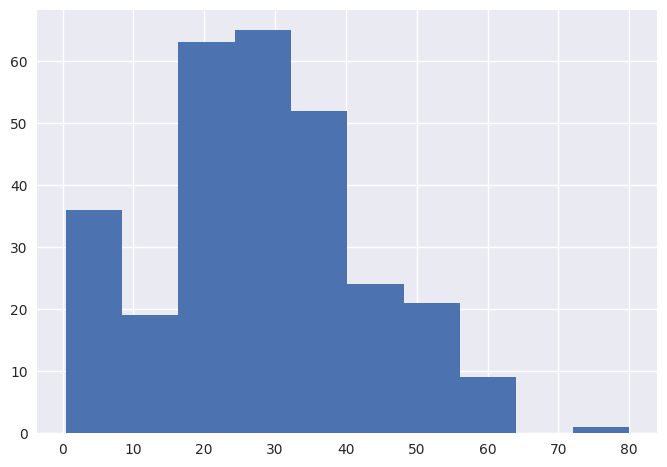

In [1943]:
df_train[df_train['Survived'] == 1]['Age'].hist()

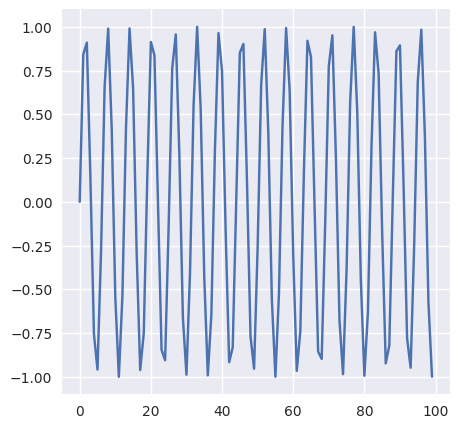

In [1944]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)

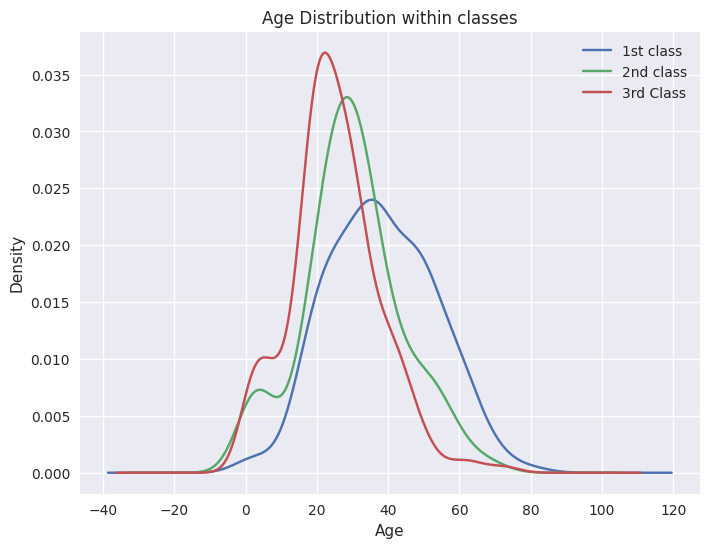

In [1945]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')

#ax면 set을 붙이고 아니면 그냥
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd Class'])


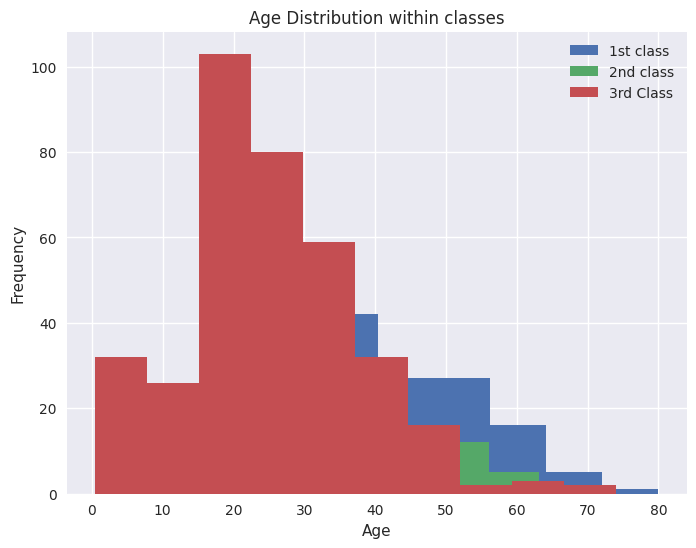

In [1946]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='hist')
df_train['Age'][df_train['Pclass']==2].plot(kind='hist')
df_train['Age'][df_train['Pclass']==3].plot(kind='hist')

#ax면 set을 붙이고 아니면 그냥
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2nd class', '3rd Class'])


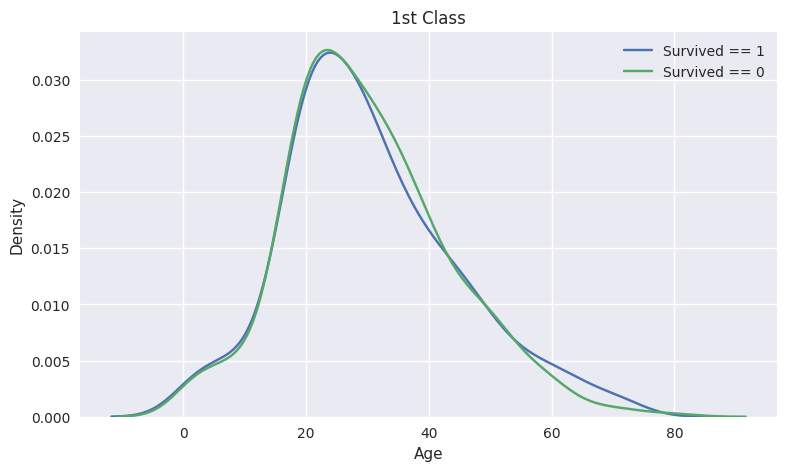

In [1947]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 0 & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 1 & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st Class')
plt.show()

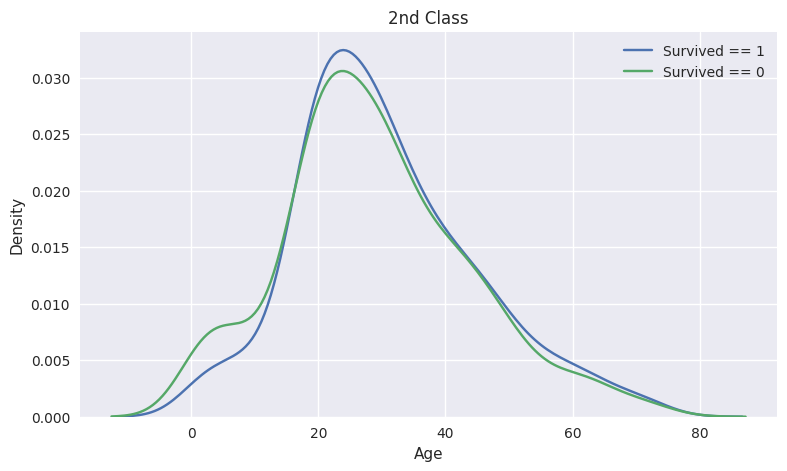

In [1948]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 0 & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 1 & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2nd Class')
plt.show()

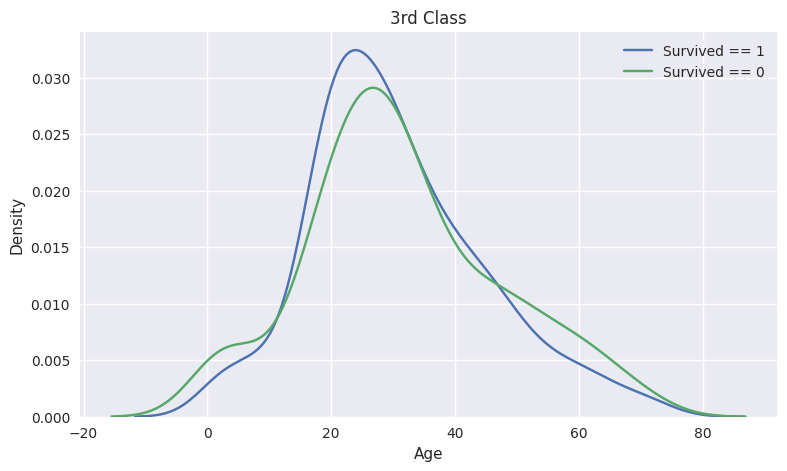

In [1949]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 0 & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 1 & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3rd Class')
plt.show()

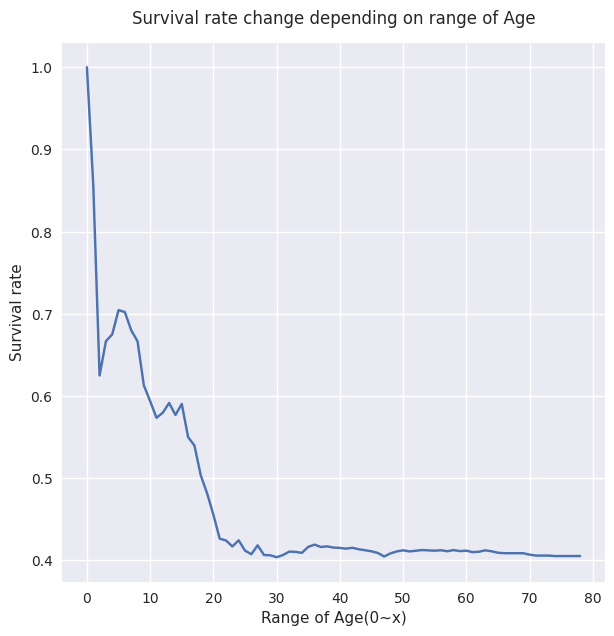

In [1950]:
change_age_range_survival_ratio = []

for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [1951]:
i = 10
df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived'])

0.6129032258064516

i = 목표 나이<br>
10살 이하의 탑승객에 대한 평균 생존률

결론: 나이가 어릴수록 생존확률이 높다

# 2-3-1. Pclass, Sex, Age 모아보기

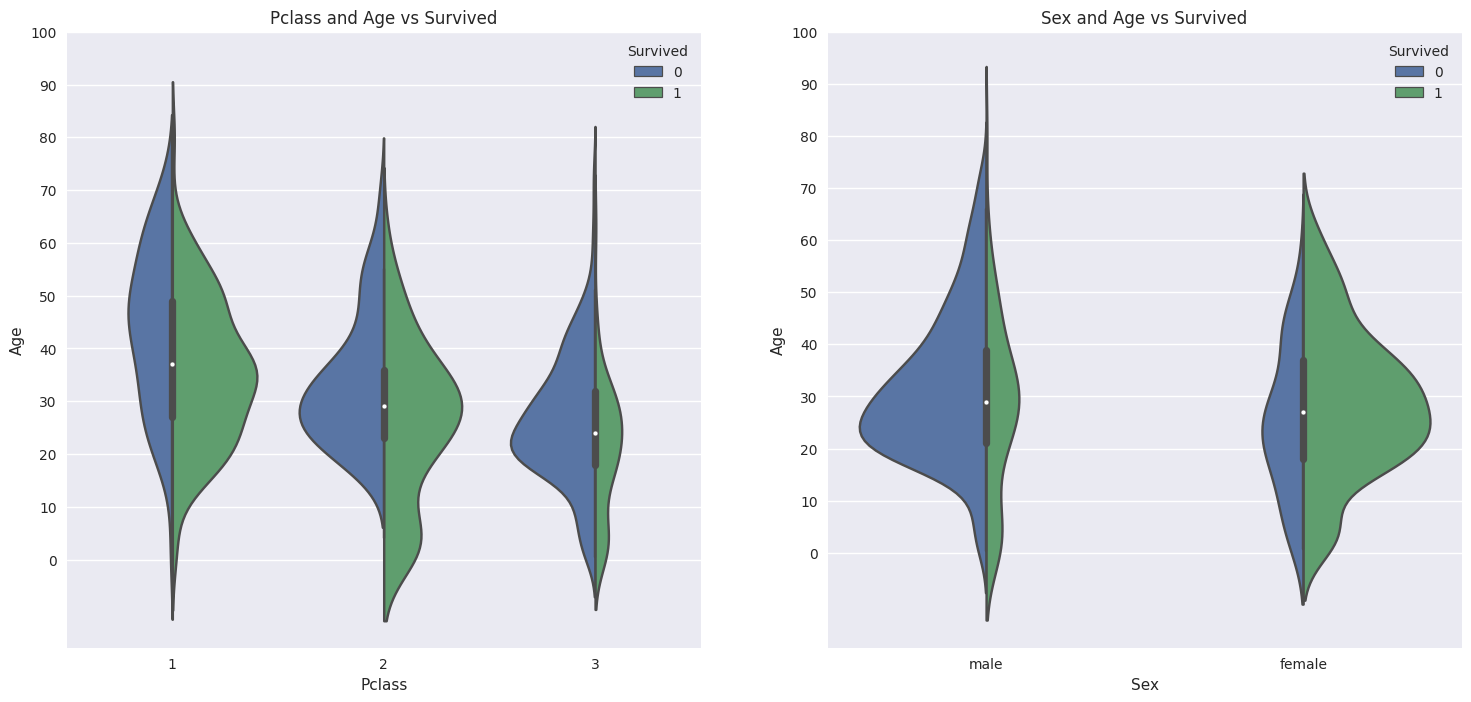

In [1952]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))


plt.show()

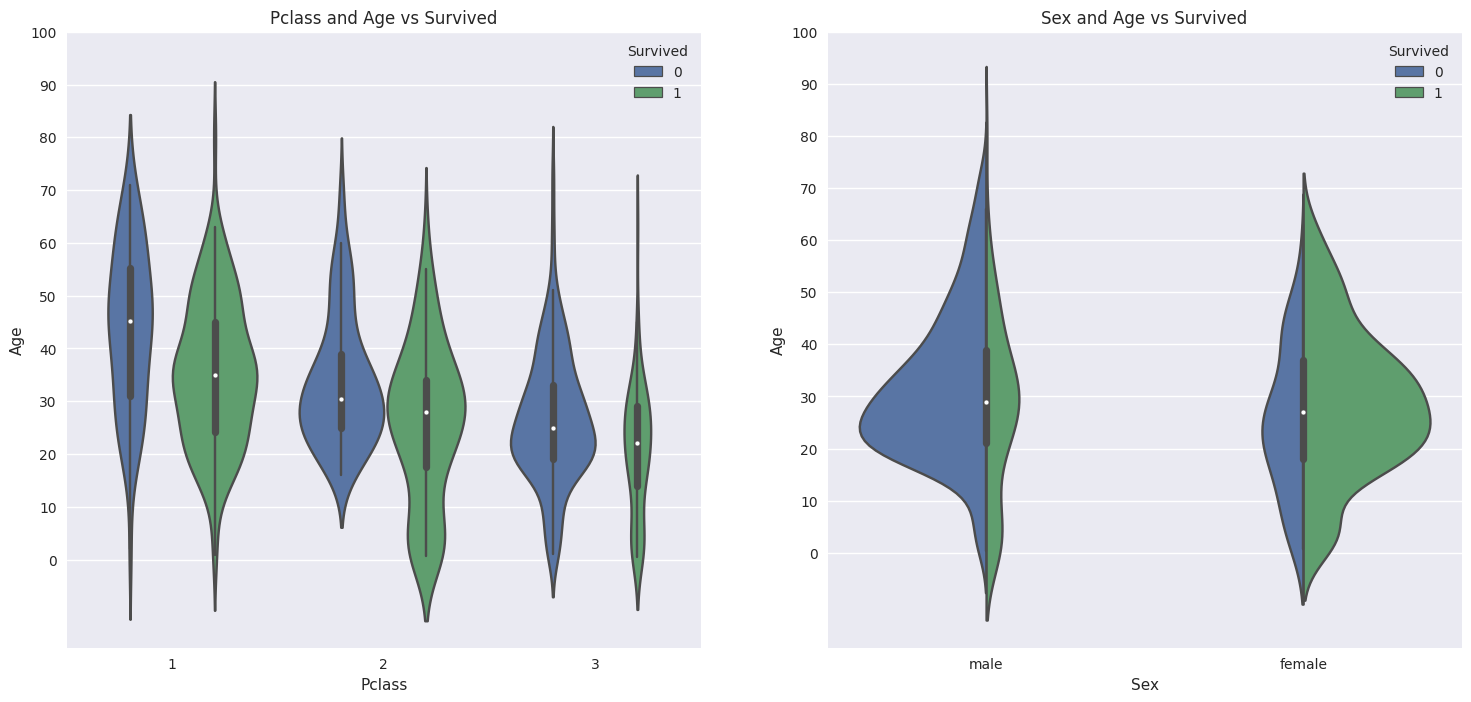

In [1953]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=False, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))


plt.show()

# 2-4. Embarked (탑승한 항구)

<Axes: xlabel='Embarked'>

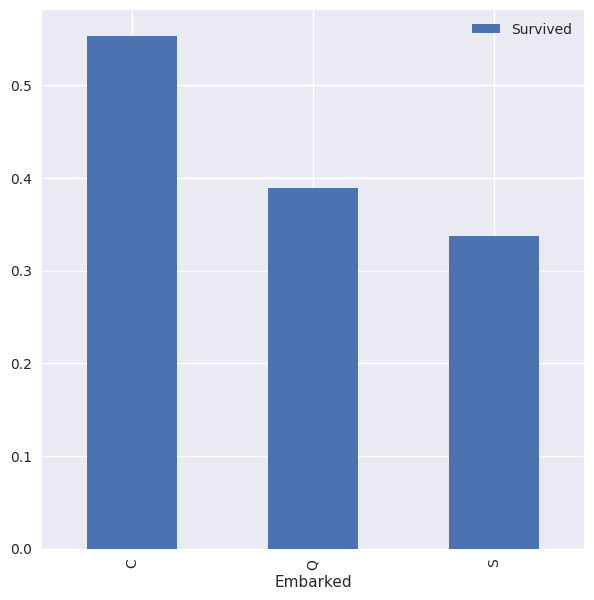

In [1954]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)


In [1955]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [1956]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Embarked')

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [1957]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index(ascending=False)

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


Featrue Importance : 어떤 피처가 중요한지를 학습을 통해서 뽑아낼 수 있다

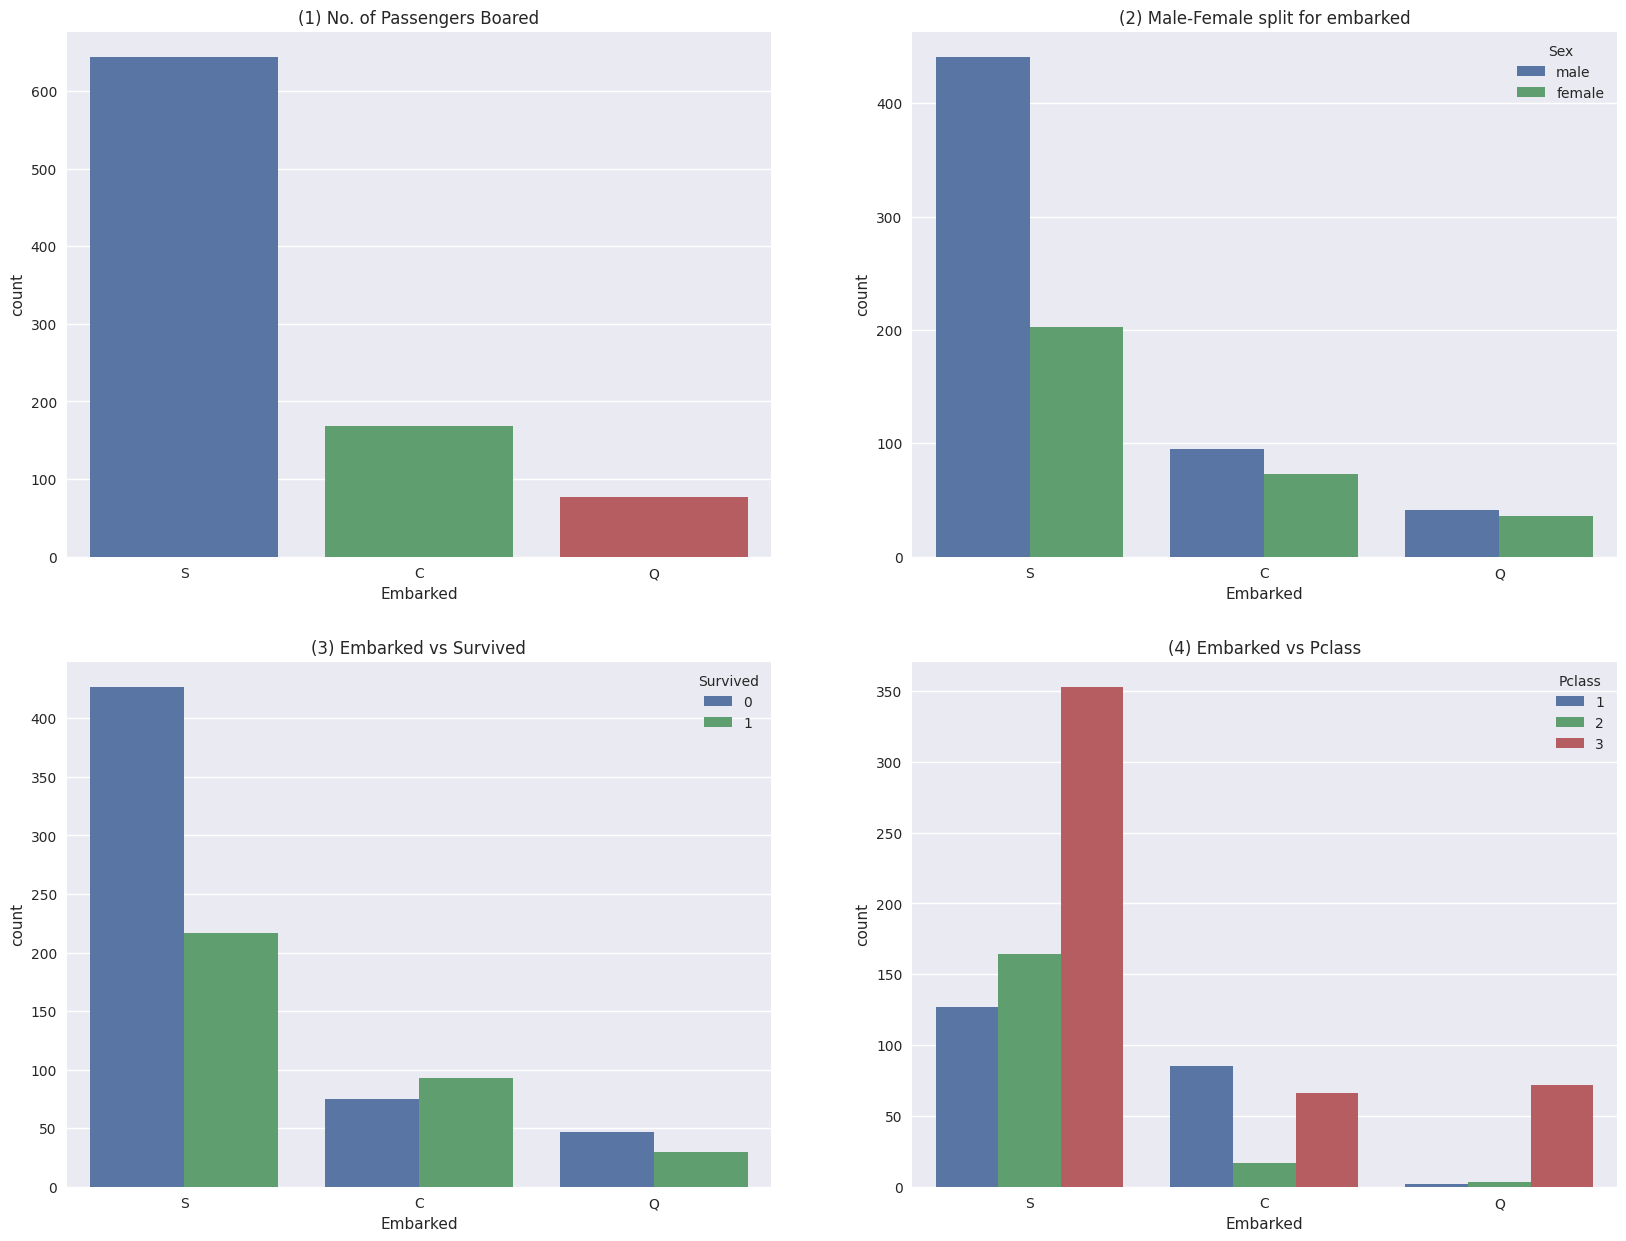

In [1958]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title("(1) No. of Passengers Boared")

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title("(2) Male-Female split for embarked")

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs Survived")

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title("(4) Embarked vs Pclass")

plt.subplots_adjust(wspace=0.2, hspace=0.2) # 가로 세로 간격
plt.show()

결론: C항구에서는 성과 First Class에 탄사람이 많기 때문에 생존률이 높게나왔다

# 2-5. Familiy - SibSp + Parch

In [1959]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

df_train['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [1960]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


pd.Series는 사칙연산이 가능하다. Python list의 연산과 일치함

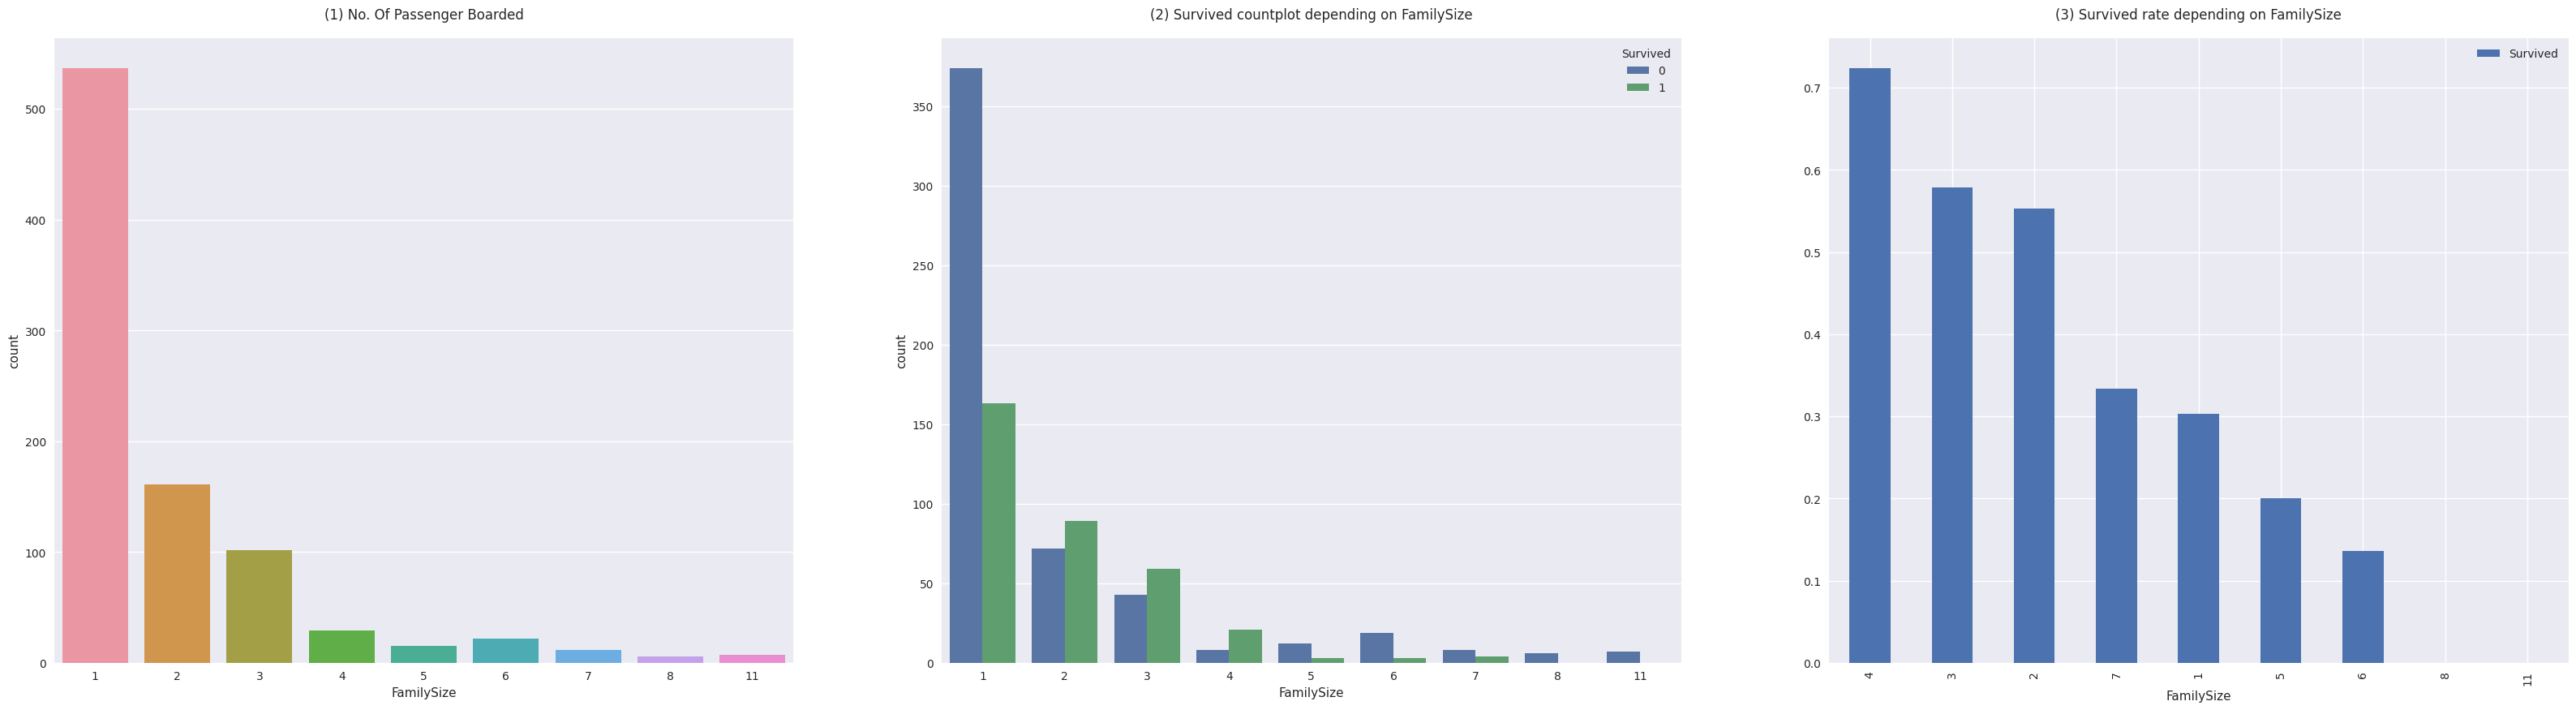

In [1961]:
f, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

결론: 가족 구성원이 너무 적어도 안좋고 너무 많아도 안좋다.

# 2-6. Fare, Cabin, Ticket

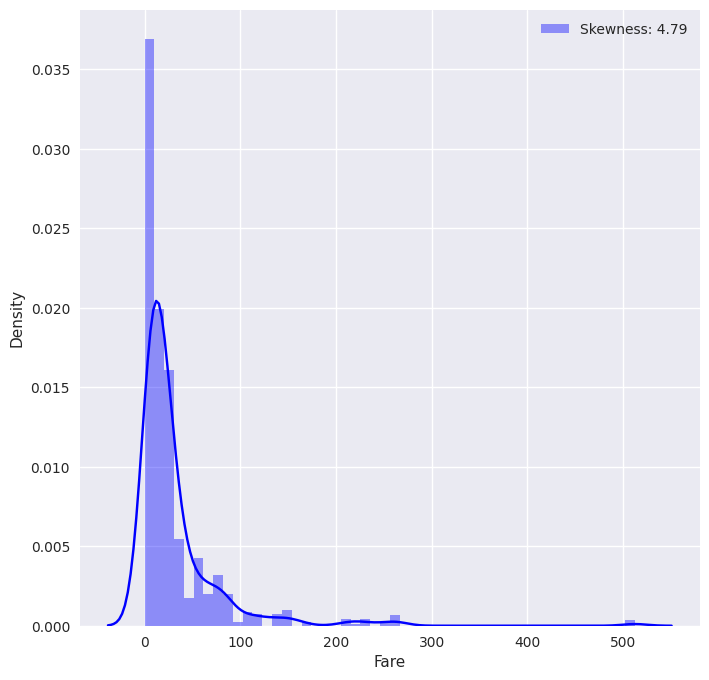

In [1962]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

skewness = 왜도: 평균을 중심으로 한쪽으로 치우쳐져 있는 경향을 나타내는 척도. a>0이면 좌측으로 치우치고, 반대는 우측.

In [1963]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

0보다 큰 값에 대해 log를 취해 skewness를 해소해줌. 이는 Feature Engineering임

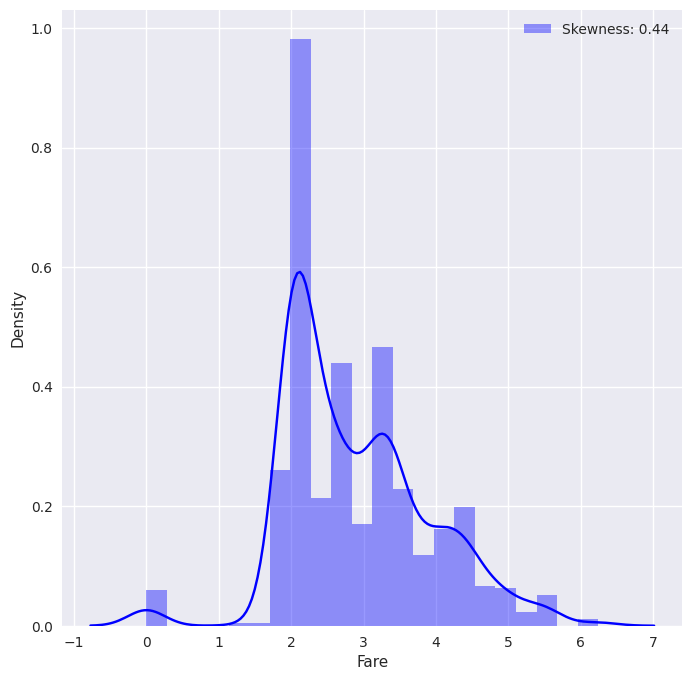

In [1964]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [1965]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

ticket같은 경우는 좀 더 분석해보고 피처 엔지니어링 해보기

In [1966]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
df_test['Fare'].isnull().sum()

0

# 3. Feature Engineering

# 3-2. Embarked

파이썬 정규표현식으로 특정 문자열을 추출하기


먼저 Age의 결측값을 적절하게 채우기 위해 이름에서 성별을 유추할 수 있는 부분을 추출하여 새로운 레이블로 만든다.

In [1967]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,Mrs


In [1968]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [1969]:
df_train['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)
df_test['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona'], 
                           ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

<Axes: xlabel='Initial'>

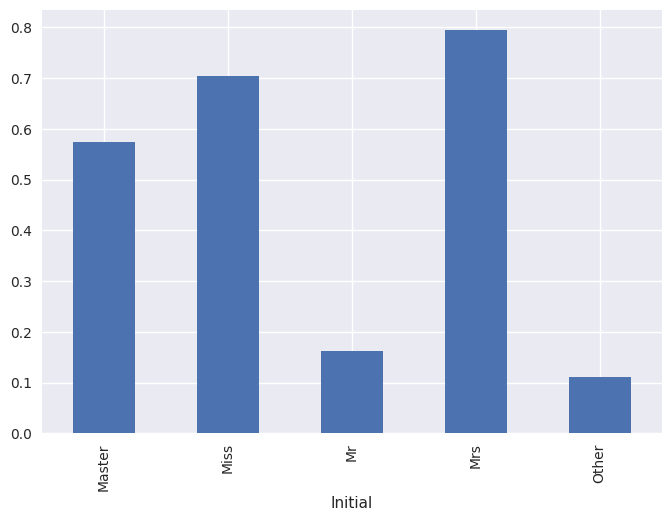

In [1970]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [1971]:
df_all = pd.concat([df_train, df_test])
df_all.reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900000,C105,C,1,Mr
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,1,Mr


In [1972]:
df_train.loc[1:3, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs


In [1973]:
df_train.loc[df_train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


loc에 관련한 pandas 중요 문법!<br>슬라이싱 인덱스에 불린값을 넣을 수 있음!

In [1974]:
df_train['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [1975]:
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'), 'Age']

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 120, dtype: float64

그러니까 df.loc[조건식, 컬럼명] 으로 쓸수가 있다

In [1976]:
df_all.groupby('Initial')['Age'].mean()

Initial
Master     5.482642
Miss      21.834533
Mr        32.556397
Mrs       37.034884
Other     44.923077
Name: Age, dtype: float64

In [1977]:
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'), 'Age'] = 33
df_test.loc[df_test['Age'].isnull() & (df_test['Initial'] == 'Mr'), 'Age'] = 33
# Mr 이름을 가진 사람의 평균 나이가 32.55 라서 33세로 할

In [1978]:
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Mr'), 'Age']

Series([], Name: Age, dtype: float64)

In [1979]:
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Master'), 'Age'] = 33
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[df_train['Age'].isnull() & (df_train['Initial'] == 'Other'), 'Age'] = 45

df_test.loc[df_test['Age'].isnull() & (df_test['Initial'] == 'Master'), 'Age'] = 33
df_test.loc[df_test['Age'].isnull() & (df_test['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[df_test['Age'].isnull() & (df_test['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[df_test['Age'].isnull() & (df_test['Initial'] == 'Other'), 'Age'] = 45

In [1980]:
df_train['Age'].isnull().sum()

0

In [1981]:
df_test['Age'].isnull().sum()

0

# 3-2. Embarked & Age Categorize

In [1982]:
df_train['Embarked'].isnull().sum()

2

결측값이 두개박에 없어서 그냥 가장 대부분의 항구 값으로 함

In [1983]:
df_train['Embarked'].fillna('S', inplace=True)

In [1984]:
df_train['Embarked'].isnull().sum()

0

In [1985]:
df_train['Age_cat'] = 0
df_test['Age_cat'] = 0
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,0


In [1986]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) &  (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) &  (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) &  (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) &  (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) &  (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) &  (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

In [1987]:
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) &  (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) &  (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) &  (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) &  (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) &  (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) &  (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

빡코딩으로 나이 카테고리화하기

In [1988]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3


In [1989]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
    
df_train['Age'].apply(category_age)

0      2
1      3
2      2
3      3
4      3
      ..
886    2
887    1
888    2
889    2
890    3
Name: Age, Length: 891, dtype: int64

함수를 만든 후 apply를 써서 카테고리화하기

In [1990]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)
#(df_train['Age_cat'] == df_train['Age_cat_2']).all()

In [1991]:
#df_train.loc[df_train['Age_cat'] != df_train['Age_cat_2']]

In [1992]:
#df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_train.drop(['Age'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace=True)
# axis는 1로 해줘야 새로가 날라감

# 3-3. Initial

In [1993]:
df_train.Initial.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [1994]:
df_train.loc[df_train['Initial'] == 'Master', 'Initial']

7      Master
16     Master
50     Master
59     Master
63     Master
65     Master
78     Master
125    Master
159    Master
164    Master
165    Master
171    Master
176    Master
182    Master
183    Master
193    Master
261    Master
278    Master
305    Master
340    Master
348    Master
386    Master
407    Master
445    Master
480    Master
489    Master
549    Master
709    Master
751    Master
755    Master
787    Master
788    Master
802    Master
803    Master
819    Master
824    Master
827    Master
831    Master
850    Master
869    Master
Name: Initial, dtype: object

In [1995]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [1996]:
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

# 3-4. Embarked

In [1997]:
df_train.Embarked.unique() # return type is np.array

array(['S', 'C', 'Q'], dtype=object)

In [1998]:
df_train['Embarked'].value_counts() # return type is np.Series

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [1999]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [2000]:
df_test

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,1,1,2,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,2,2,3,4
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,1,1,2,6
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,2,1,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,2,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,2,1,2,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,0,1,2,3
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,1,2,3
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,2,1,2,3


In [2001]:
df_train.Embarked.isnull().any() # 널값이 하나도 없으면 False

False

# 3-5. Sex

In [2002]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [2003]:
df_train['Sex'] = df_train['Sex'].map({'female':0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female':0, 'male':1})

# 3-6. Pearson Coefficient

이제, 결측값 처리는 끝났고, 각 피처간 선형적 상관관계를 확인해야함. Pearson Correlation으로 표현이가능함. 1: 양의 상관관계 -1: 음의 상관관계 0: 선형적 관계 없음

<Axes: title={'center': 'Pearson Correlation of Features.'}>

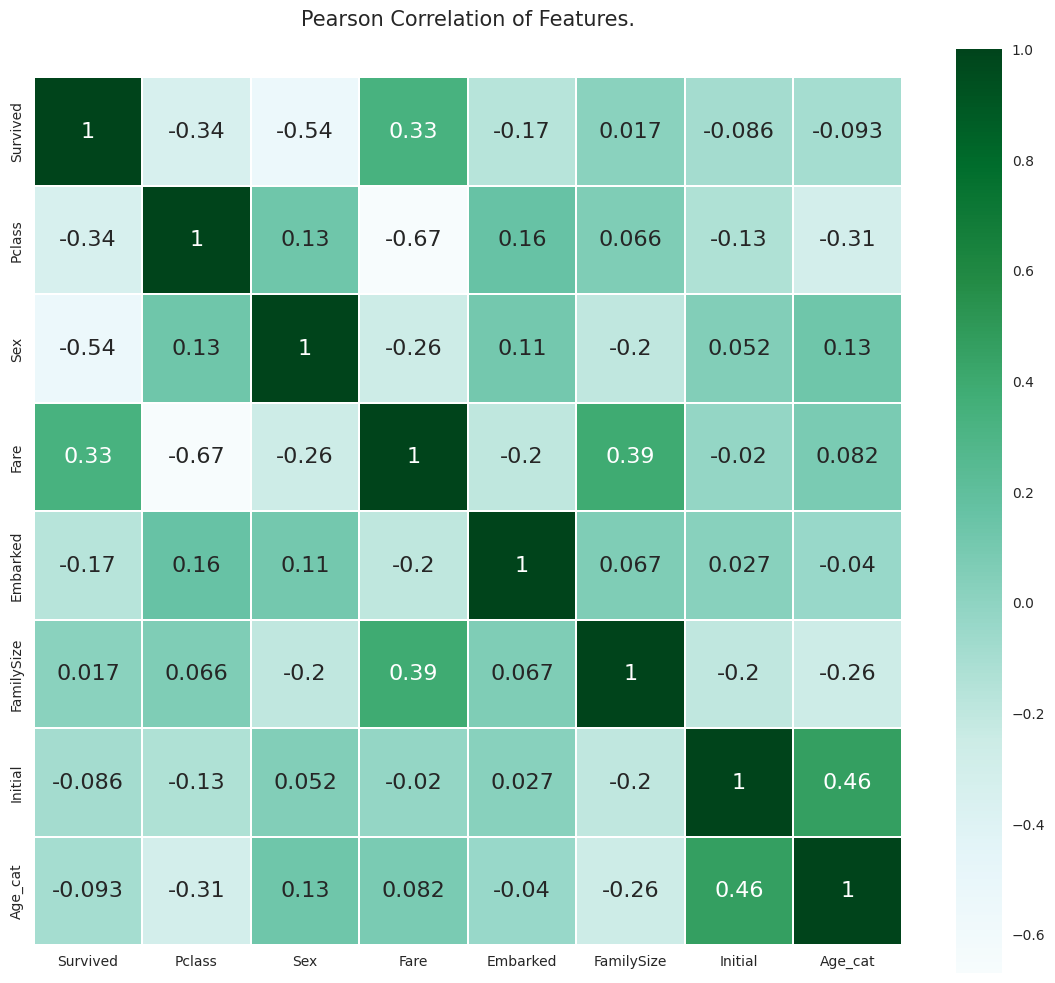

In [2004]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]
heatmap_data.corr()


colormap = plt.cm.BuGn
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features.', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 16})

In [2005]:
df_test['Age_cat']

0      3
1      4
2      6
3      2
4      2
      ..
413    3
414    3
415    3
416    3
417    3
Name: Age_cat, Length: 418, dtype: int64

# 3-7. One-hot encoding

In [2006]:
pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,2,False,False,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,False,True,False,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,2,False,True,False,False,False
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,False,False,True,False,False


In [2007]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial', dtype=int)
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial', dtype=int)

In [2008]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,0,0,211536,2.564949,NaN,2,1,2,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,0,0,112053,3.401197,B42,2,1,1,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1,2,W./C. 6607,3.154870,NaN,2,4,2,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",1,0,0,111369,3.401197,C148,0,1,2,0,0,1,0,0


In [2009]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked', dtype=int)
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked', dtype=int)

In [2010]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


여기서 알수있듯 원핫인코딩은 카테고리형 데이터에 적용하고 카테고리 수만큼 컬럼이 늘어나는걸 알수있음. 만약 카테고리가 너무 많을경우에는 어떻게 할까?

In [2011]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [2012]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [2013]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [2014]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

# 4. Model Development

# 4-1. Dataset Split, Model Create

In [2015]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

df_test.isnull().sum()

Pclass        0
Sex           0
Fare          0
FamilySize    0
Age_cat       0
Initial_0     0
Initial_1     0
Initial_2     0
Initial_3     0
Initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

In [2016]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [2017]:
X_tr.shape

(623, 13)

In [2018]:
X_vld.shape

(268, 13)

In [2019]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [2020]:
prediction = model.predict(X_vld)

In [2021]:
prediction

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1])

In [2022]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존 맞춤


In [2023]:
prediction == y_vld

array([ True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,

In [2024]:
(prediction == y_vld).sum() / prediction.shape[0]

0.8246268656716418

# 4-2. Feature Importance

학습된 모델이 어떤 feature의 영향을 많이 받았는지 확인하기

In [2025]:
model.feature_importances_

array([0.09821028, 0.09367862, 0.32547378, 0.0918544 , 0.11780917,
       0.01072743, 0.04298075, 0.14304443, 0.02540026, 0.00507638,
       0.01285084, 0.01285059, 0.02004308])

In [2026]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [2027]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,7.8292,1,3,0,0,1,0,0,0,1,0
1,3,0,7.0000,2,4,0,0,0,1,0,0,0,1
2,2,1,9.6875,1,6,0,0,1,0,0,0,1,0
3,3,1,8.6625,1,2,0,0,1,0,0,0,0,1
4,3,0,12.2875,3,2,0,0,0,1,0,0,0,1


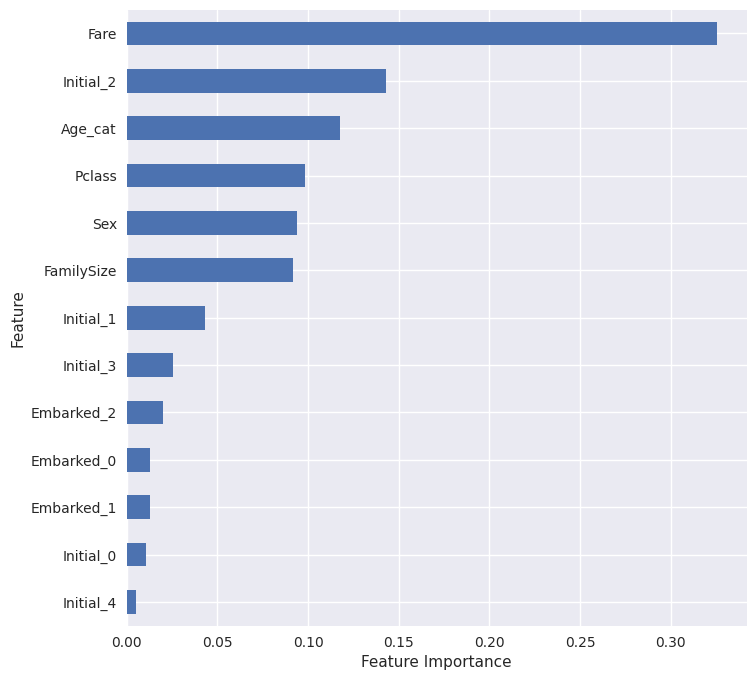

In [2028]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [2029]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [2030]:
print(submission.shape, X_test.shape)

(418, 2) (418, 13)


In [2031]:
prediction = model.predict(X_test)

result =pd.DataFrame({
    'PassengerId':submission['PassengerId'],
    'Survived': prediction
})

In [2033]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [2032]:
result.to_csv('/kaggle/working//good.csv', index=False)